### Khaiii 형태소 분석기 기반 텍스트 EDA

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)

In [44]:
data = pd.read_csv('./hate_speech.csv', index_col=0)

In [3]:
# 기사 타이틀은 제외하고, 모든 전처리 적용한 토큰에 대해서만 EDA 진행
data = data[['removed_stopword_corpus', 'label']]

In [4]:
data.columns = ['comments', 'label']
data.head()

,comments,label
0,현재/MAG 호텔/NNG 주인/NNG 심정/NNG 나/VA 마른하늘/NNG 벼락/M...,hate
1,한국/NNP 미인/NNG 대표/NNG 분/NNB 너무나/MAG 곱/VA 아름답/VA...,none
2,못되/VA 놈/NNB 남/NNG 고통/NNG 즐기다/VV 놈/NNB 이제하다/VV ...,hate
3,화/NNB 어설프/VA 지나다/VV 갈/MAG 록/MAG 너무/MAG 재밌/VA,none
4,사람/NNG 얼굴/NNG 손톱/NNG 긁다/VV 것/NNB 인격/NNG 살해/NNG...,hate


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7893 entries, 0 to 7895
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   comments  7886 non-null   object
 1   label     7893 non-null   object
dtypes: object(2)
memory usage: 185.0+ KB


In [6]:
# 포스태깅에서 없어진 7개인듯? 일단 그냥 없애주고 진행
data.isnull().sum()
data.dropna(inplace=True)
data.reset_index(inplace=True, drop=True)
data.head(3)

,comments,label
0,현재/MAG 호텔/NNG 주인/NNG 심정/NNG 나/VA 마른하늘/NNG 벼락/M...,hate
1,한국/NNP 미인/NNG 대표/NNG 분/NNB 너무나/MAG 곱/VA 아름답/VA...,none
2,못되/VA 놈/NNB 남/NNG 고통/NNG 즐기다/VV 놈/NNB 이제하다/VV ...,hate


In [7]:
# 토큰수 계산후 토큰수 컬럼 추가
token_count = [len(comment.split()) for comment in data['comments']]
data['token_count'] = token_count
data.head(3)

,comments,label,token_count
0,현재/MAG 호텔/NNG 주인/NNG 심정/NNG 나/VA 마른하늘/NNG 벼락/M...,hate,14
1,한국/NNP 미인/NNG 대표/NNG 분/NNB 너무나/MAG 곱/VA 아름답/VA...,none,15
2,못되/VA 놈/NNB 남/NNG 고통/NNG 즐기다/VV 놈/NNB 이제하다/VV ...,hate,16


In [8]:
# 데이터 프레임 분리
total_df = data.copy()
hate_df = data[data['label'] == 'hate']
offensive_df = data[data['label'] == 'offensive']
not_none_df = data[data['label'] != 'none']
none_df = data[data['label'] == 'none']

In [9]:
# 데이터프레임 토큰 수 추출하는 함수
def get_token_count(df):
    tokens = []
    for sentence in df['comments']:
        words = sentence.split()
        for word in words:
            tokens.append(word)
    tmp = np.unique(np.array(tokens), return_counts=True)
    tokens_df = pd.DataFrame({"token" : tmp[0],
                             "count" : tmp[1]})
    tokens_df.sort_values("count", ascending=False, inplace=True)
    return tokens_df

In [10]:
total_tcounts = get_token_count(total_df)
hate_tcounts = get_token_count(hate_df)
offensive_tcounts = get_token_count(offensive_df)
not_none_tcounts = get_token_count(not_none_df)
none_tcounts = get_token_count(none_df)

In [11]:
total_tcounts.head(10)

,token,count
13358,하다/VV,2126
5572,보다/VV,1455
848,것/NNB,1361
719,거/NNB,1123
10217,있다/VV,937
7894,안/MAG,875
8356,없/VA,720
3415,되다/VV,690
10372,잘/MAG,617
11163,좋/VA,609


Text(0.5, 1.0, 'HATE')

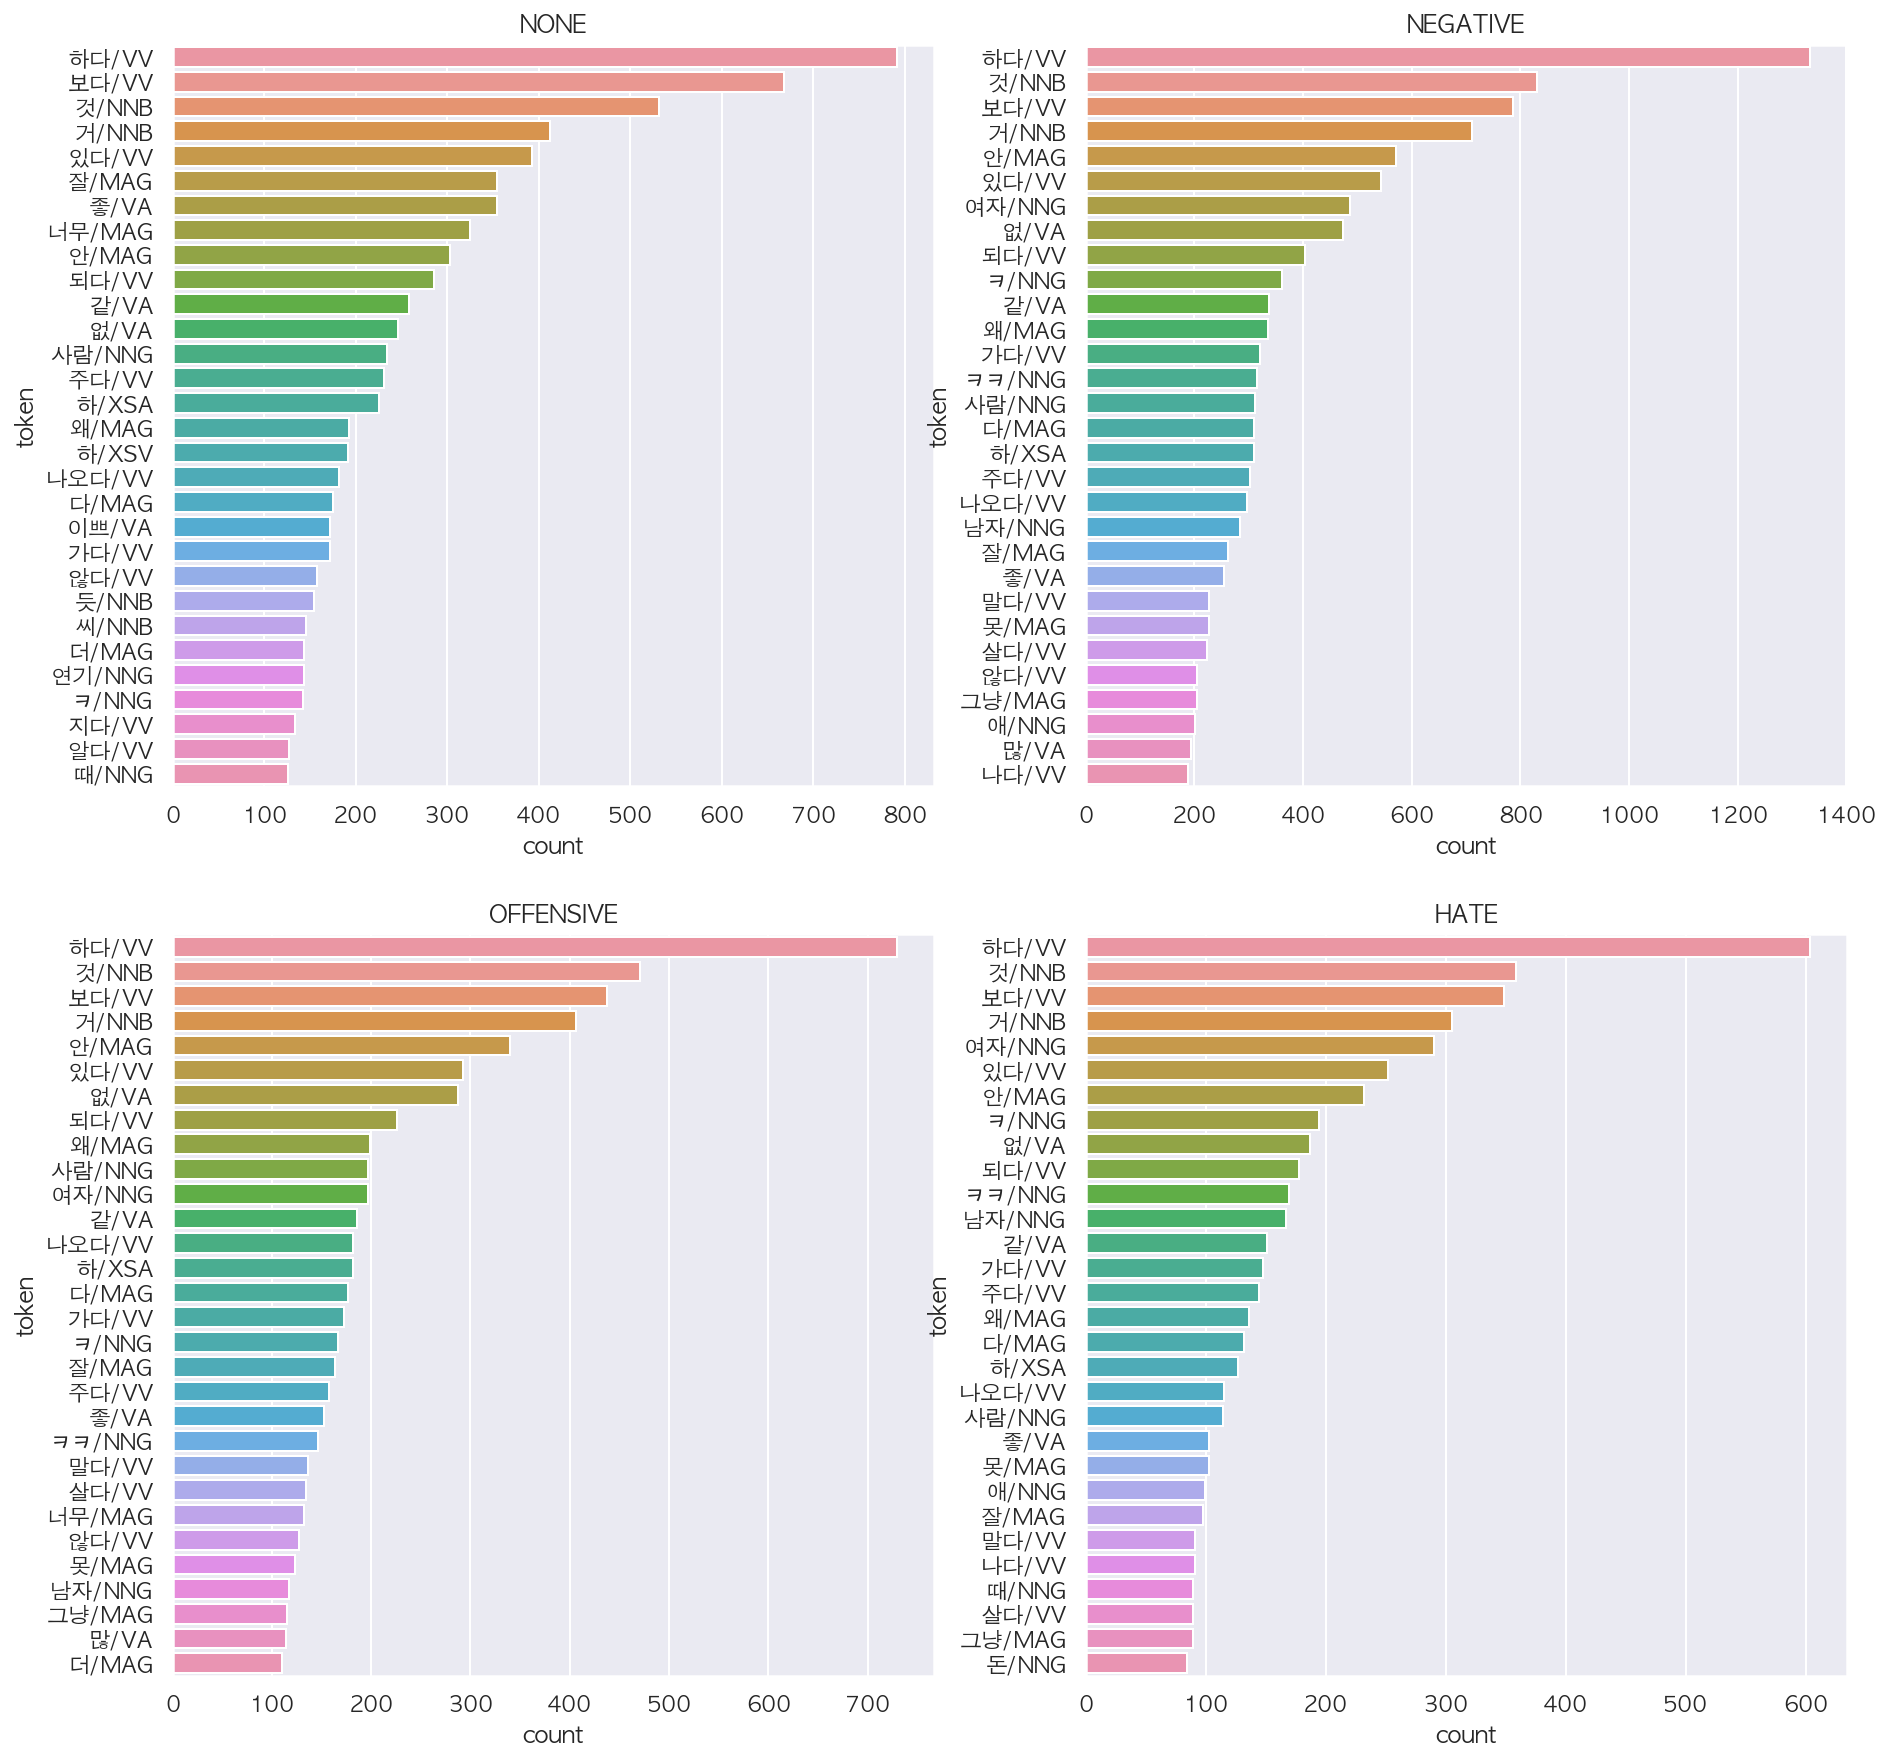

In [12]:
sns.set(font='AppleGothic', font_scale=1, rc={'figure.figsize':(15, 15)})
fig, axes = plt.subplots(2, 2)
sns.barplot(x='count', y='token', data=none_tcounts[:30], ax=axes[0,0])
axes[0,0].set_title('NONE')
sns.barplot(x='count', y='token', data=not_none_tcounts[:30], ax=axes[0,1])
axes[0,1].set_title('NEGATIVE')
sns.barplot(x='count', y='token', data=offensive_tcounts[:30], ax=axes[1,0])
axes[1,0].set_title('OFFENSIVE')
sns.barplot(x='count', y='token', data=hate_tcounts[:30], ax=axes[1,1])
axes[1,1].set_title('HATE')

In [13]:
total_tcounts['token'] = total_tcounts['token'].str.replace('/', ' ').str.split().str[0]
none_tcounts['token'] = none_tcounts['token'].str.replace('/', ' ').str.split().str[0]
offensive_tcounts['token'] = offensive_tcounts['token'].str.replace('/', ' ').str.split().str[0]
hate_tcounts['token'] = hate_tcounts['token'].str.replace('/', ' ').str.split().str[0]
not_none_tcounts['token'] = not_none_tcounts['token'].str.replace('/', ' ').str.split().str[0]

In [14]:
total_tcounts.reset_index(inplace=True, drop=True)
none_tcounts.reset_index(inplace=True, drop=True)
offensive_tcounts.reset_index(inplace=True, drop=True)
hate_tcounts.reset_index(inplace=True, drop=True)
not_none_tcounts.reset_index(inplace=True, drop=True)

In [17]:
total_tcounts = total_tcounts[total_tcounts['token'].map(len) >= 2]
hate_tcounts = hate_tcounts[hate_tcounts['token'].map(len) >= 2]
offensive_tcounts = offensive_tcounts[offensive_tcounts['token'].map(len) >= 2]
not_none_tcounts = not_none_tcounts[not_none_tcounts['token'].map(len) >= 2]
none_tcounts = none_tcounts[none_tcounts['token'].map(len) >= 2]

Text(0.5, 1.0, 'HATE')

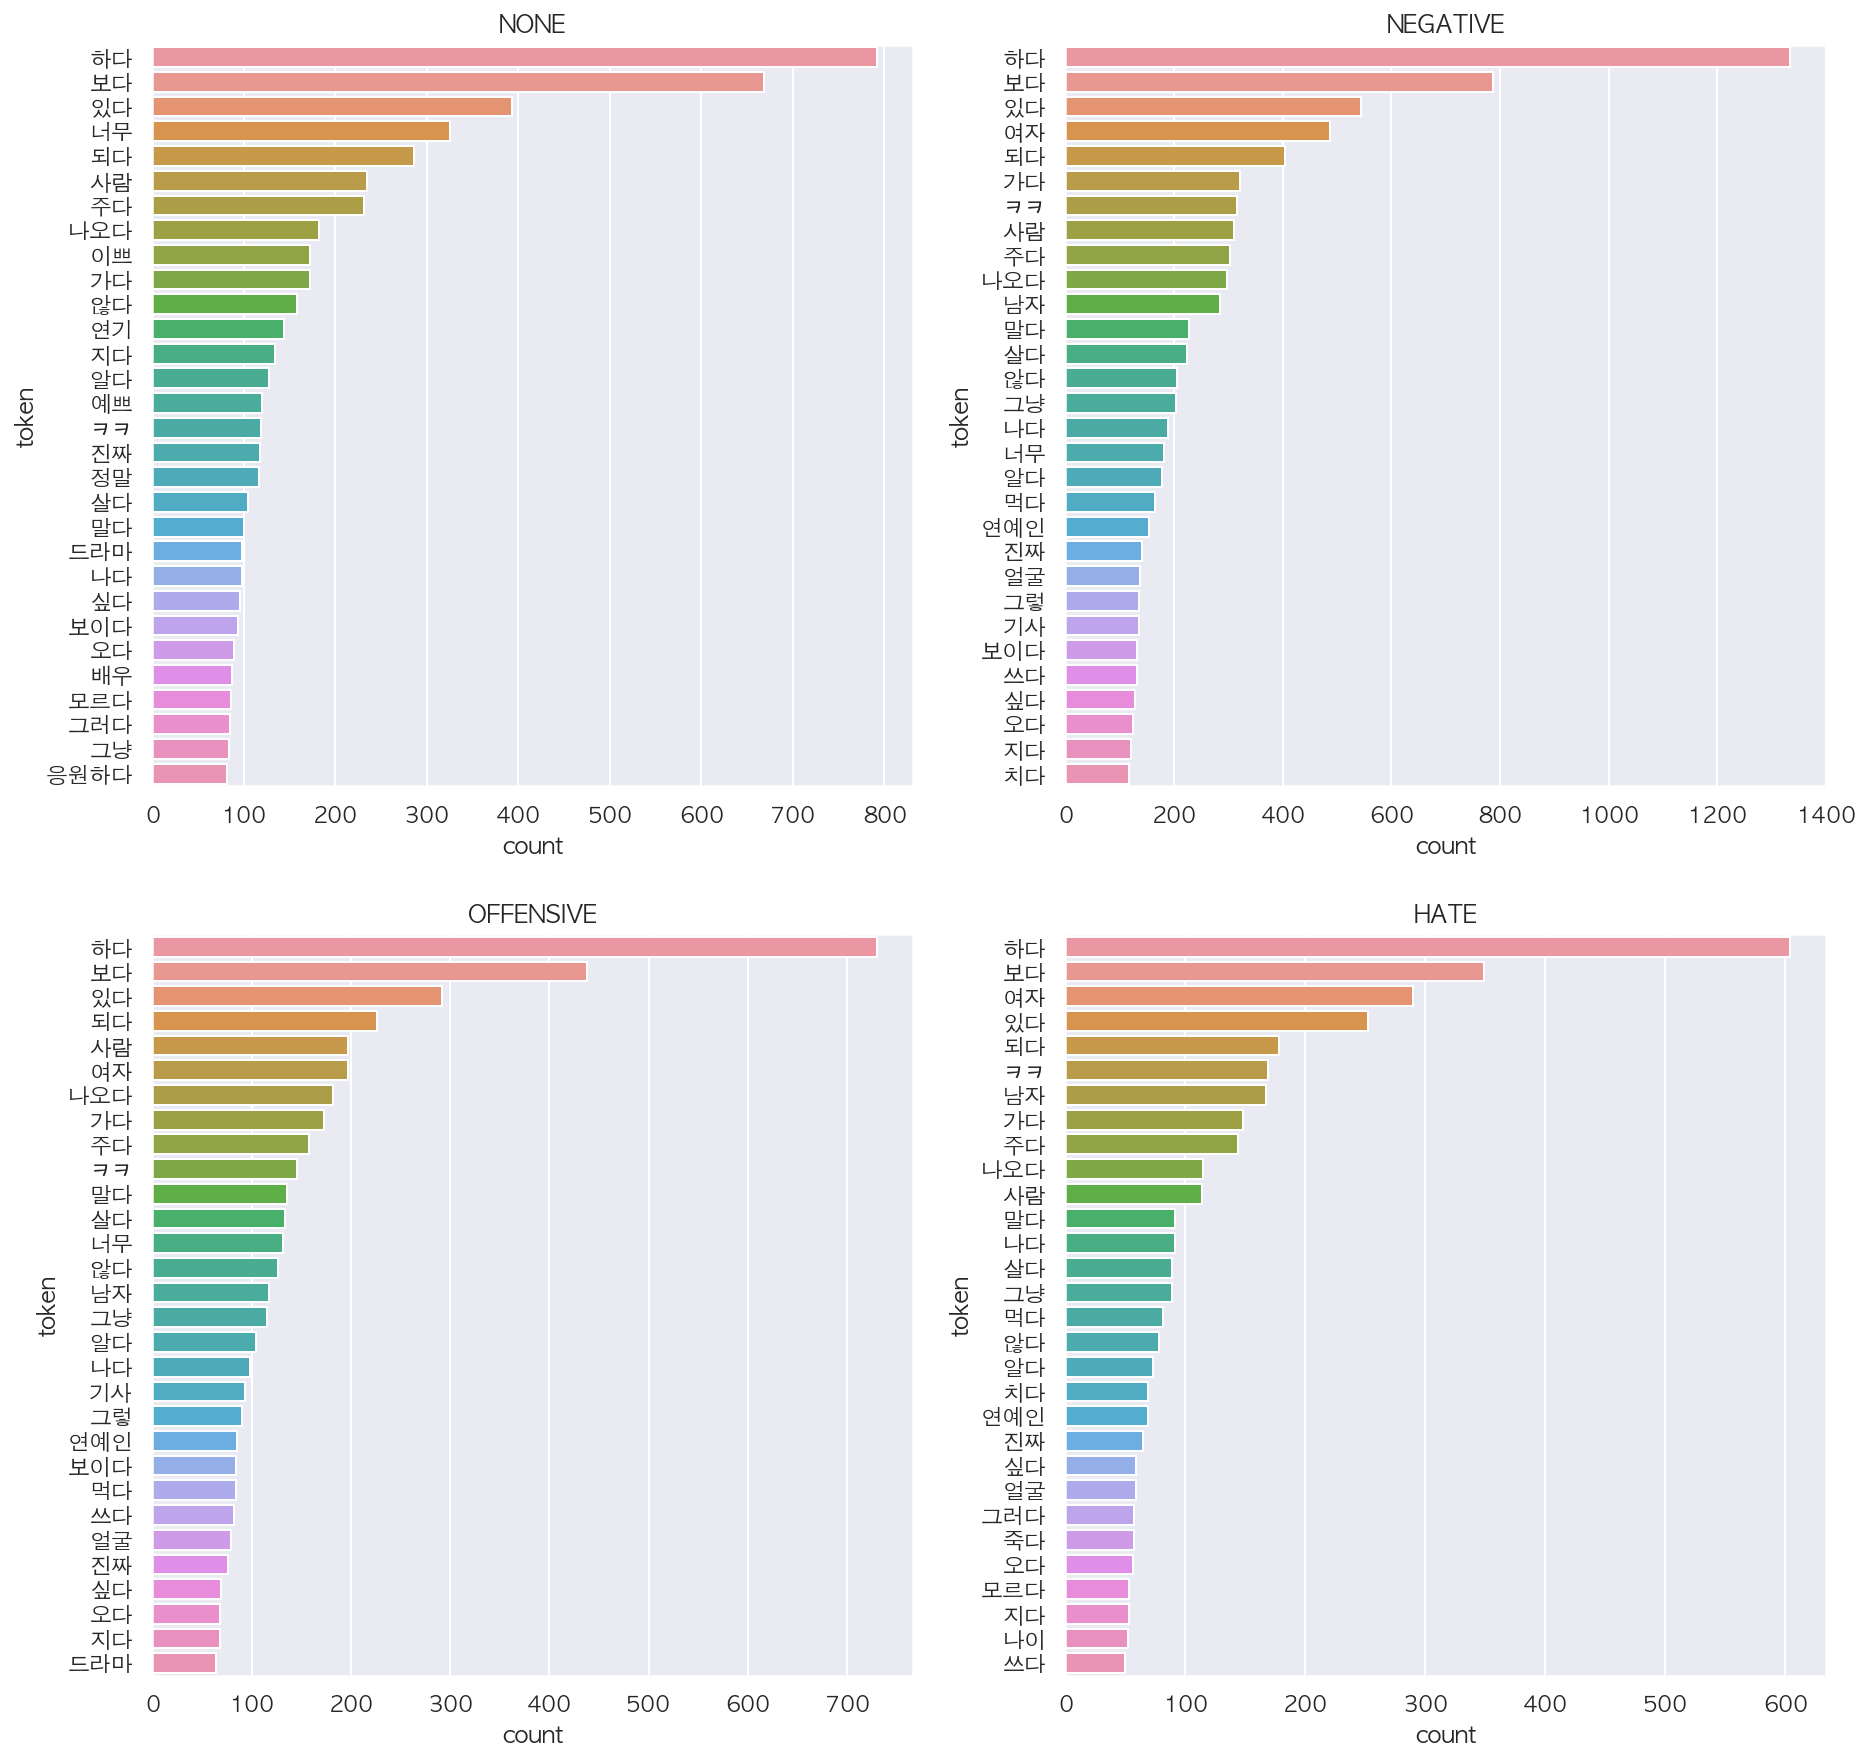

In [18]:
sns.set(font='AppleGothic', font_scale=1, rc={'figure.figsize':(15, 15)})
fig, axes = plt.subplots(2, 2)
sns.barplot(x='count', y='token', data=none_tcounts[:30], ax=axes[0,0])
axes[0,0].set_title('NONE')
sns.barplot(x='count', y='token', data=not_none_tcounts[:30], ax=axes[0,1])
axes[0,1].set_title('NEGATIVE')
sns.barplot(x='count', y='token', data=offensive_tcounts[:30], ax=axes[1,0])
axes[1,0].set_title('OFFENSIVE')
sns.barplot(x='count', y='token', data=hate_tcounts[:30], ax=axes[1,1])
axes[1,1].set_title('HATE')

In [33]:
total_tcounts = get_token_count(total_df)
hate_tcounts = get_token_count(hate_df)
offensive_tcounts = get_token_count(offensive_df)
not_none_tcounts = get_token_count(not_none_df)
none_tcounts = get_token_count(none_df)

In [37]:
# total_tcounts[total_tcounts['token'].map(len) >= 2]
total_tcounts = total_tcounts[~total_tcounts['token'].str.contains('/VV')]
hate_tcounts = hate_tcounts[~hate_tcounts['token'].str.contains('/VV')]
offensive_tcounts = offensive_tcounts[~offensive_tcounts['token'].str.contains('/VV')]
not_none_tcounts = not_none_tcounts[~not_none_tcounts['token'].str.contains('/VV')]
none_tcounts = none_tcounts[~none_tcounts['token'].str.contains('/VV')]

In [38]:
total_tcounts['token'] = total_tcounts['token'].str.replace('/', ' ').str.split().str[0]
none_tcounts['token'] = none_tcounts['token'].str.replace('/', ' ').str.split().str[0]
offensive_tcounts['token'] = offensive_tcounts['token'].str.replace('/', ' ').str.split().str[0]
hate_tcounts['token'] = hate_tcounts['token'].str.replace('/', ' ').str.split().str[0]
not_none_tcounts['token'] = not_none_tcounts['token'].str.replace('/', ' ').str.split().str[0]

total_tcounts.reset_index(inplace=True, drop=True)
none_tcounts.reset_index(inplace=True, drop=True)
offensive_tcounts.reset_index(inplace=True, drop=True)
hate_tcounts.reset_index(inplace=True, drop=True)
not_none_tcounts.reset_index(inplace=True, drop=True)

total_tcounts = total_tcounts[total_tcounts['token'].map(len) >= 2]
hate_tcounts = hate_tcounts[hate_tcounts['token'].map(len) >= 2]
offensive_tcounts = offensive_tcounts[offensive_tcounts['token'].map(len) >= 2]
not_none_tcounts = not_none_tcounts[not_none_tcounts['token'].map(len) >= 2]
none_tcounts = none_tcounts[none_tcounts['token'].map(len) >= 2]

Text(0.5, 1.0, 'HATE')

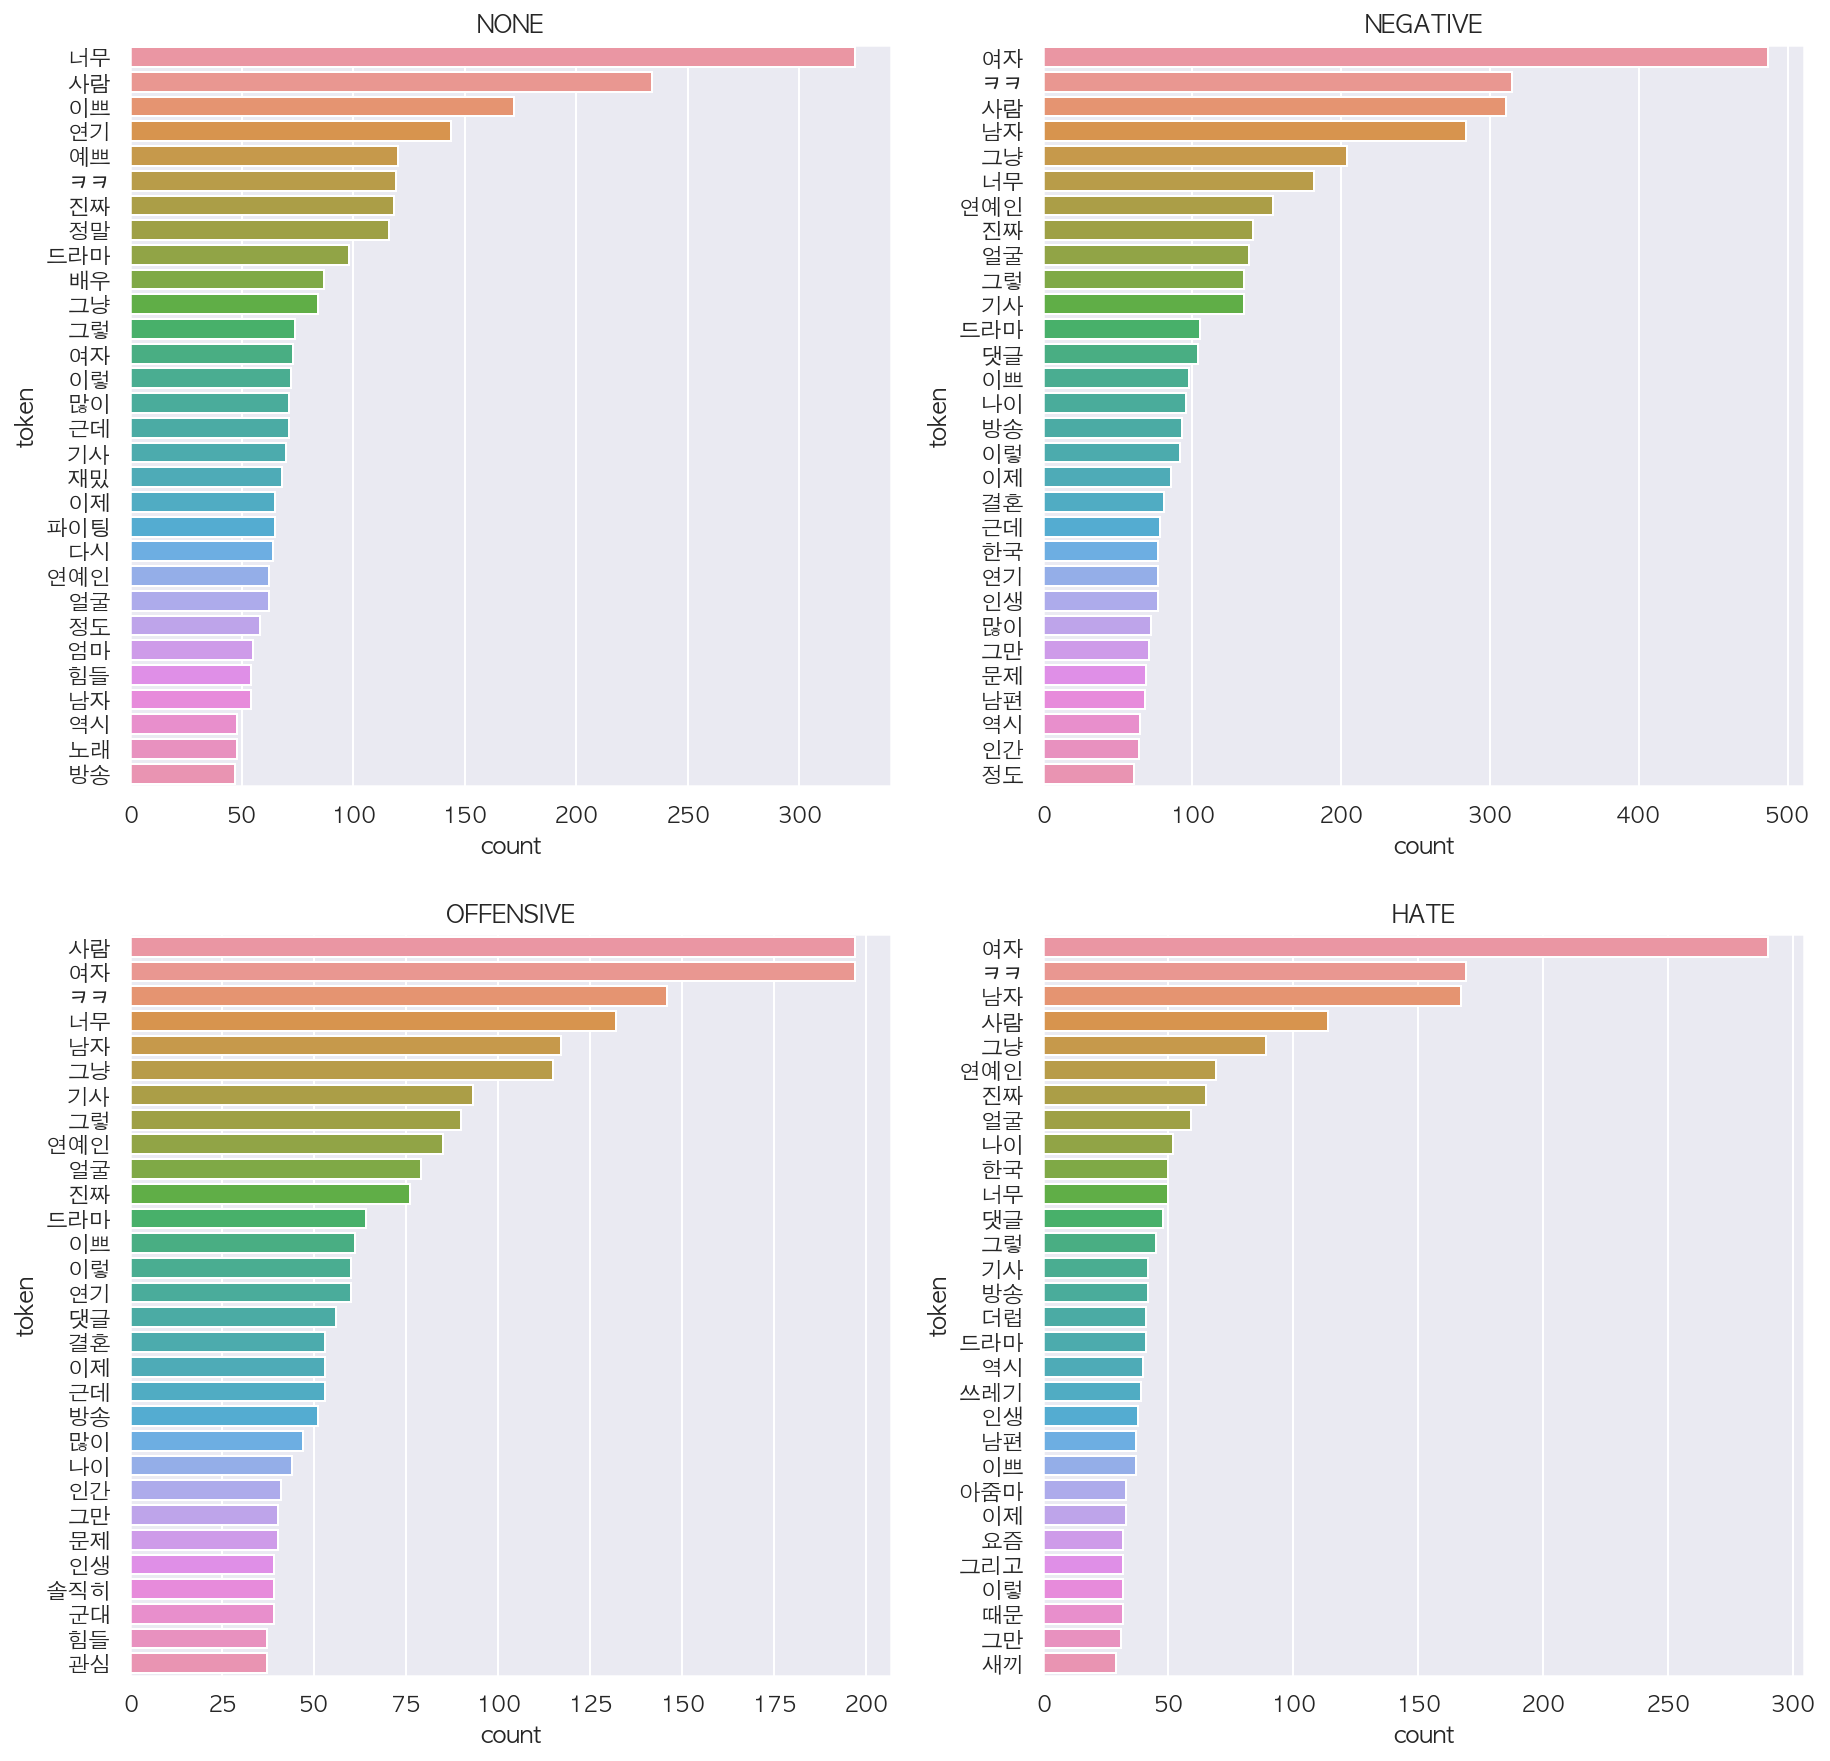

In [39]:
sns.set(font='AppleGothic', font_scale=1, rc={'figure.figsize':(15, 15)})
fig, axes = plt.subplots(2, 2)
sns.barplot(x='count', y='token', data=none_tcounts[:30], ax=axes[0,0])
axes[0,0].set_title('NONE')
sns.barplot(x='count', y='token', data=not_none_tcounts[:30], ax=axes[0,1])
axes[0,1].set_title('NEGATIVE')
sns.barplot(x='count', y='token', data=offensive_tcounts[:30], ax=axes[1,0])
axes[1,0].set_title('OFFENSIVE')
sns.barplot(x='count', y='token', data=hate_tcounts[:30], ax=axes[1,1])
axes[1,1].set_title('HATE')

Text(0.5, 1.0, 'HATE')

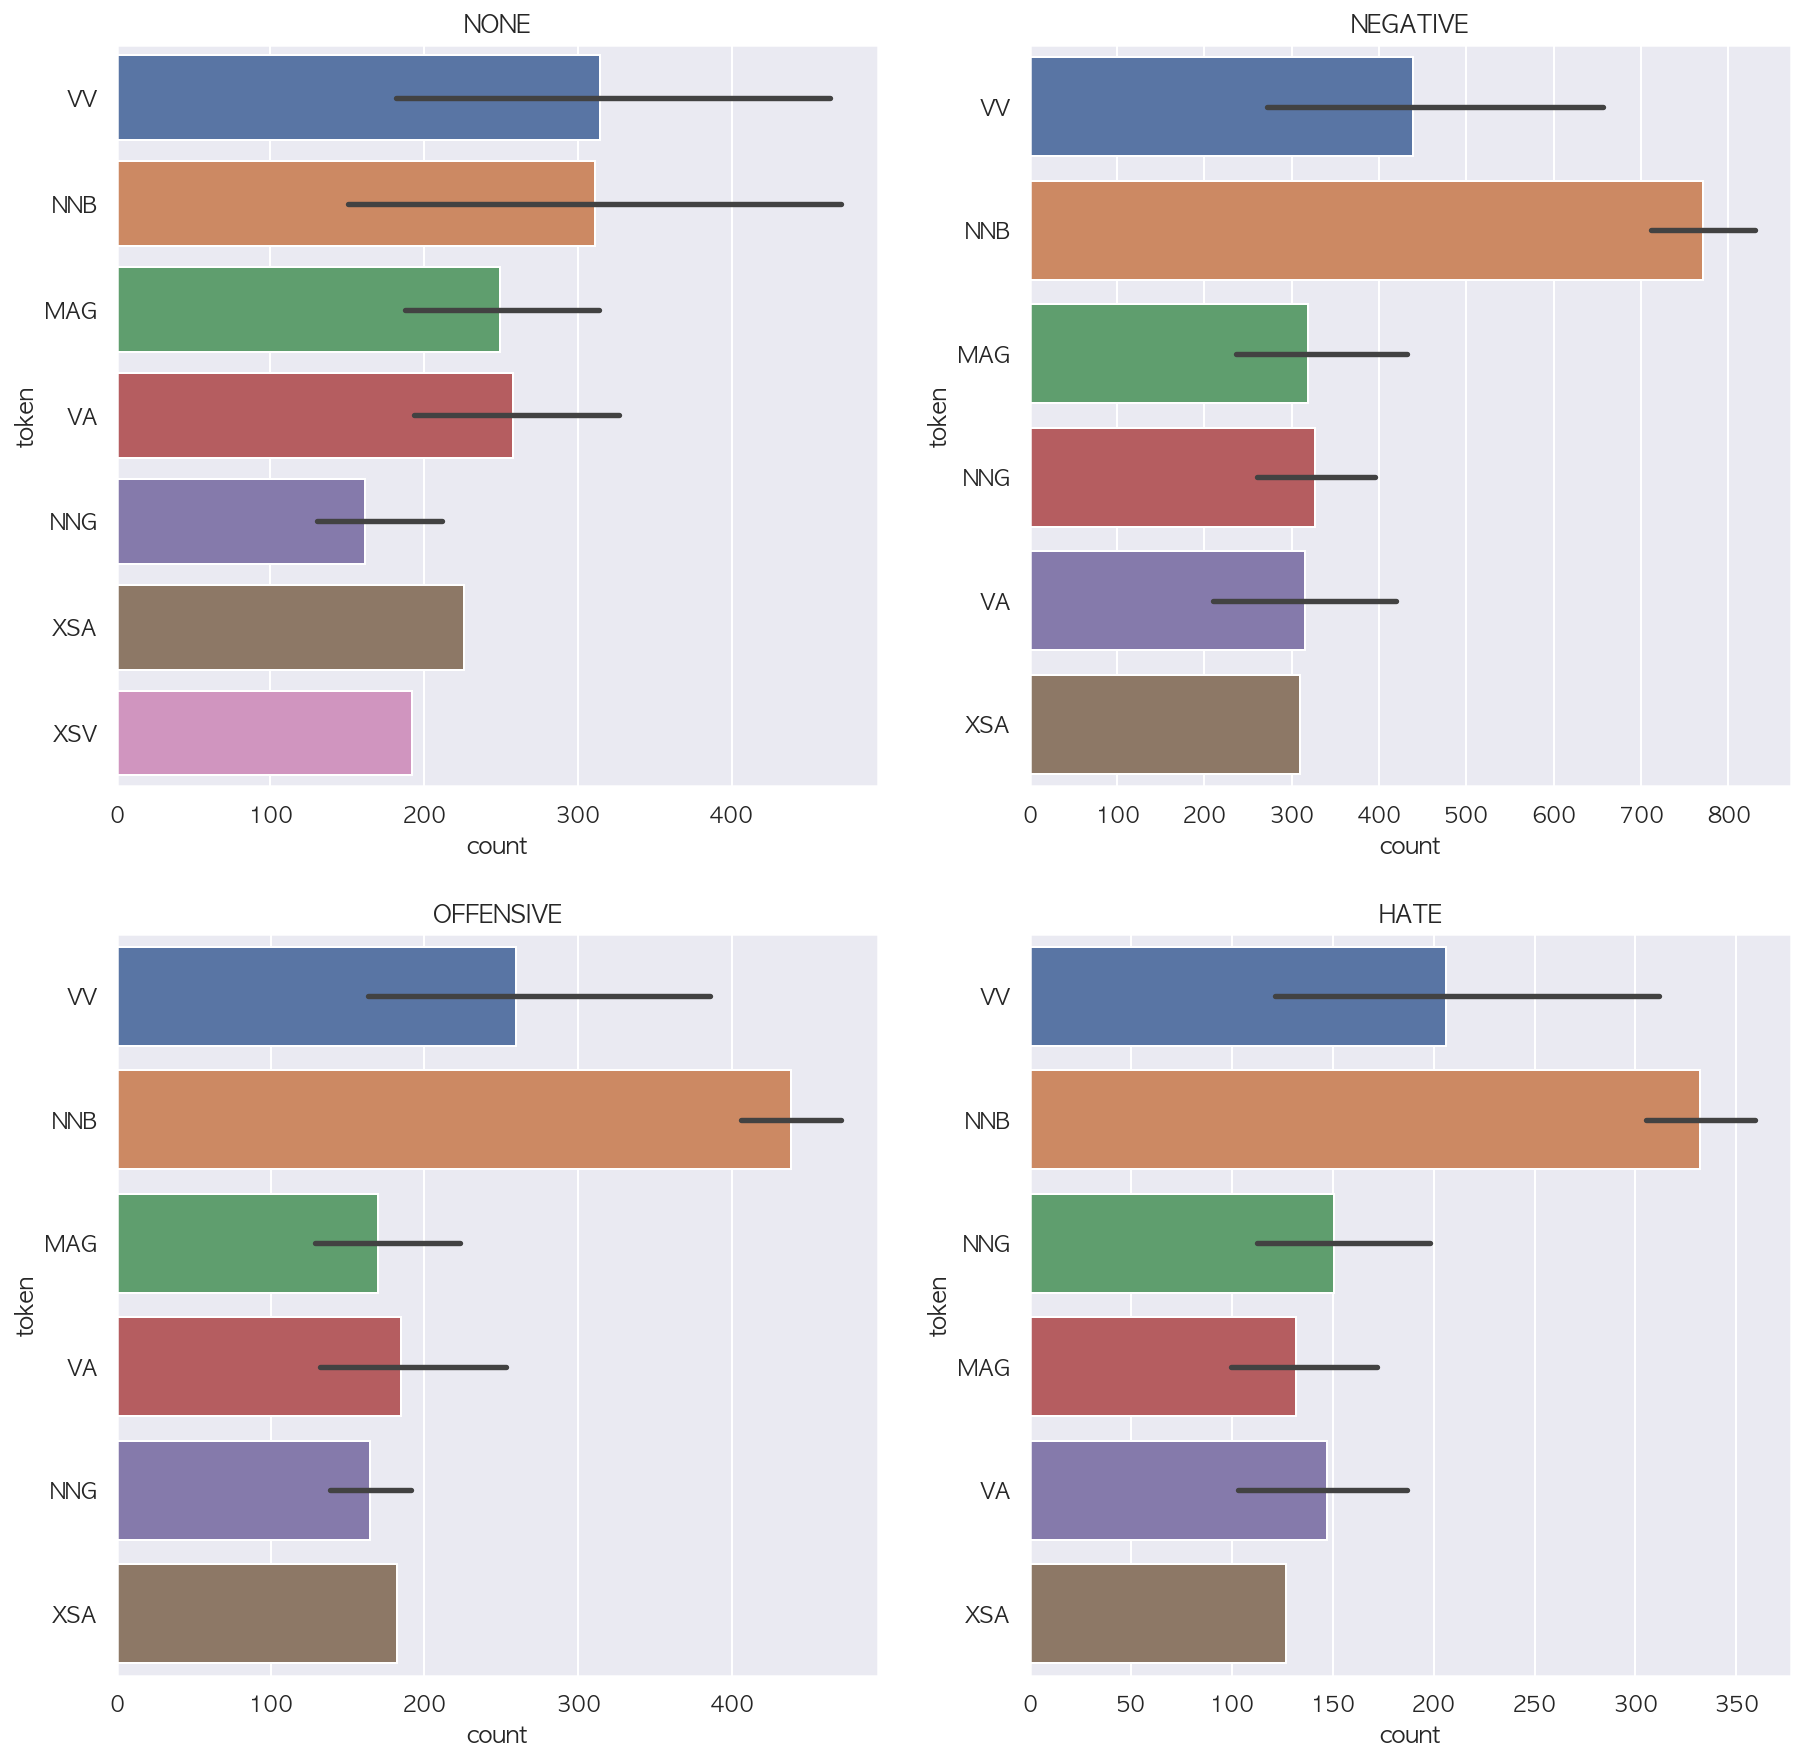

In [40]:
total_tcounts = get_token_count(total_df)
hate_tcounts = get_token_count(hate_df)
offensive_tcounts = get_token_count(offensive_df)
not_none_tcounts = get_token_count(not_none_df)
none_tcounts = get_token_count(none_df)

total_tcounts['token'] = total_tcounts['token'].str.replace('/', ' ').str.split().str[1]
none_tcounts['token'] = none_tcounts['token'].str.replace('/', ' ').str.split().str[1]
offensive_tcounts['token'] = offensive_tcounts['token'].str.replace('/', ' ').str.split().str[1]
hate_tcounts['token'] = hate_tcounts['token'].str.replace('/', ' ').str.split().str[1]
not_none_tcounts['token'] = not_none_tcounts['token'].str.replace('/', ' ').str.split().str[1]

total_tcounts.reset_index(inplace=True, drop=True)
none_tcounts.reset_index(inplace=True, drop=True)
offensive_tcounts.reset_index(inplace=True, drop=True)
hate_tcounts.reset_index(inplace=True, drop=True)
not_none_tcounts.reset_index(inplace=True, drop=True)

sns.set(font='AppleGothic', font_scale=1, rc={'figure.figsize':(15, 15)})
fig, axes = plt.subplots(2, 2)
sns.barplot(x='count', y='token', data=none_tcounts[:30], ax=axes[0,0])
axes[0,0].set_title('NONE')
sns.barplot(x='count', y='token', data=not_none_tcounts[:30], ax=axes[0,1])
axes[0,1].set_title('NEGATIVE')
sns.barplot(x='count', y='token', data=offensive_tcounts[:30], ax=axes[1,0])
axes[1,0].set_title('OFFENSIVE')
sns.barplot(x='count', y='token', data=hate_tcounts[:30], ax=axes[1,1])
axes[1,1].set_title('HATE')

### 토큰 수 분포

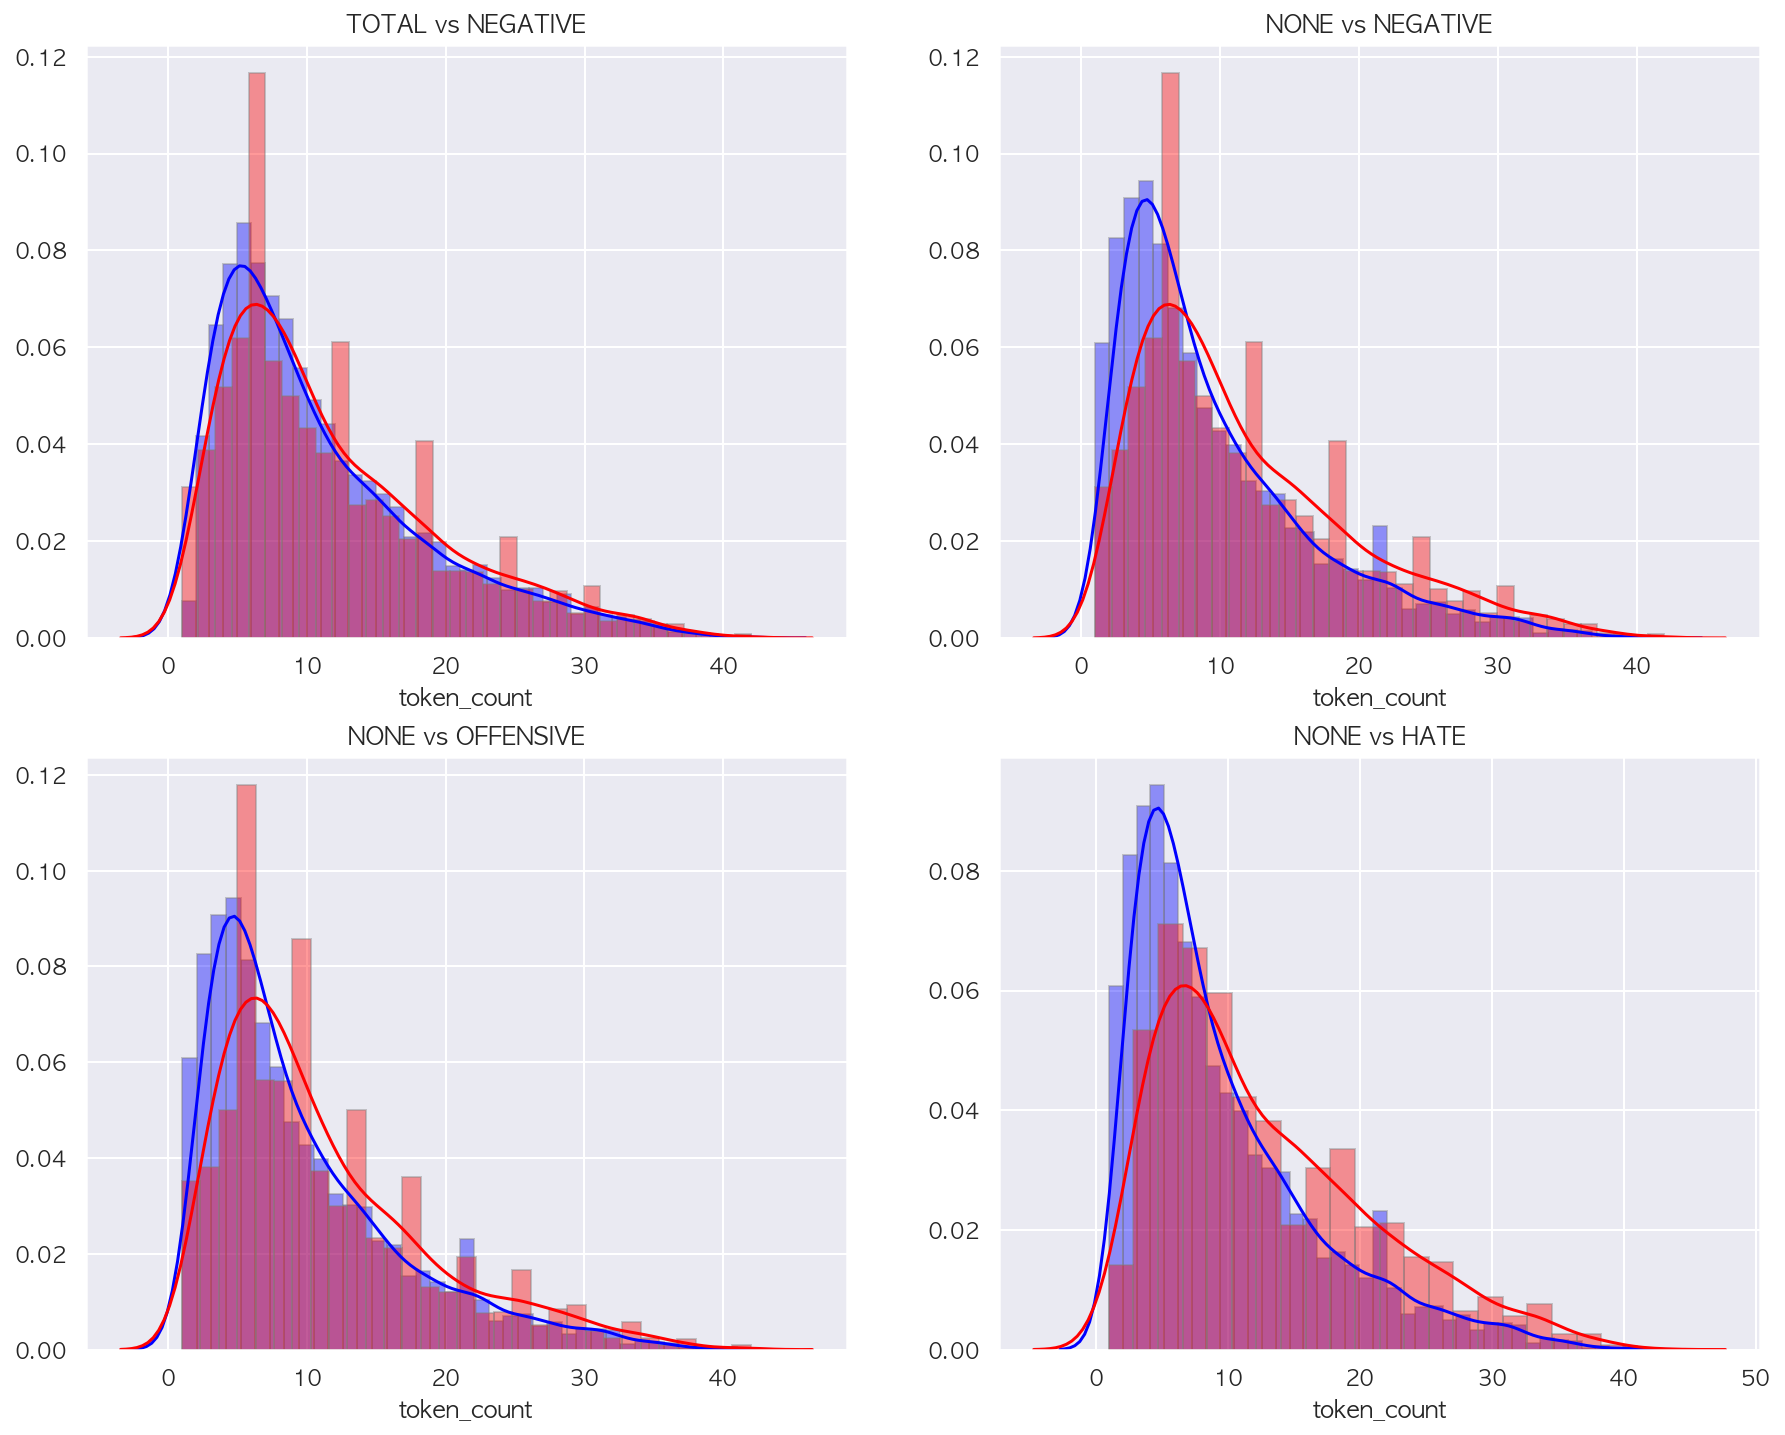

In [145]:
sns.set(font='AppleGothic', font_scale=1, rc={'figure.figsize':(15, 12)})
fig, axes = plt.subplots(2, 2)
# 토큰 수 분포 - total & none & not_none

axes[0,0].set_title('TOTAL vs NEGATIVE')
sns.distplot(total_df['token_count'], hist_kws = {'edgecolor':'gray'}, color='blue', kde=True, ax=axes[0,0])
sns.distplot(not_none_df['token_count'], hist_kws = {'edgecolor':'gray'}, color='red', kde=True, ax=axes[0,0])

axes[0,1].set_title('NONE vs NEGATIVE')
sns.distplot(none_df['token_count'], hist_kws = {'edgecolor':'gray'}, color='blue', kde=True, ax=axes[0,1])
sns.distplot(not_none_df['token_count'], hist_kws = {'edgecolor':'gray'}, color='red', kde=True, ax=axes[0,1])

axes[1,0].set_title('NONE vs OFFENSIVE')
sns.distplot(none_df['token_count'], hist_kws = {'edgecolor':'gray'}, color='blue', kde=True, ax=axes[1,0])
sns.distplot(offensive_df['token_count'], hist_kws = {'edgecolor':'gray'}, color='red', kde=True, ax=axes[1,0])

axes[1,1].set_title('NONE vs HATE')
sns.distplot(none_df['token_count'], hist_kws = {'edgecolor':'gray'}, color='blue', kde=True, ax=axes[1,1])
sns.distplot(hate_df['token_count'], hist_kws = {'edgecolor':'gray'}, color='red', kde=True, ax=axes[1,1])

plt.show()